In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('IRIS.csv')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
print(data.duplicated().sum())

3


In [ ]:
df = data.drop_duplicates()
print(df.duplicated().sum())

0


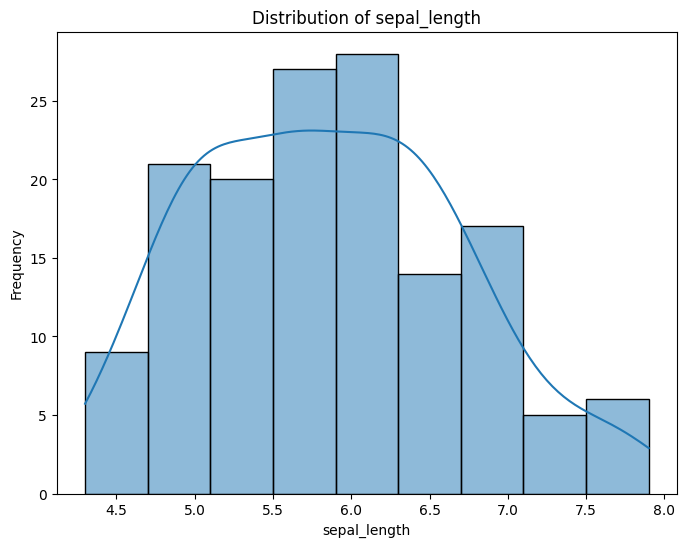

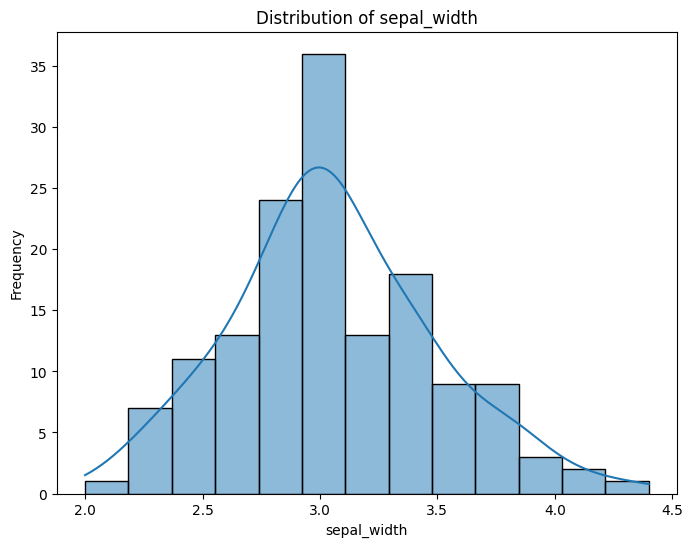

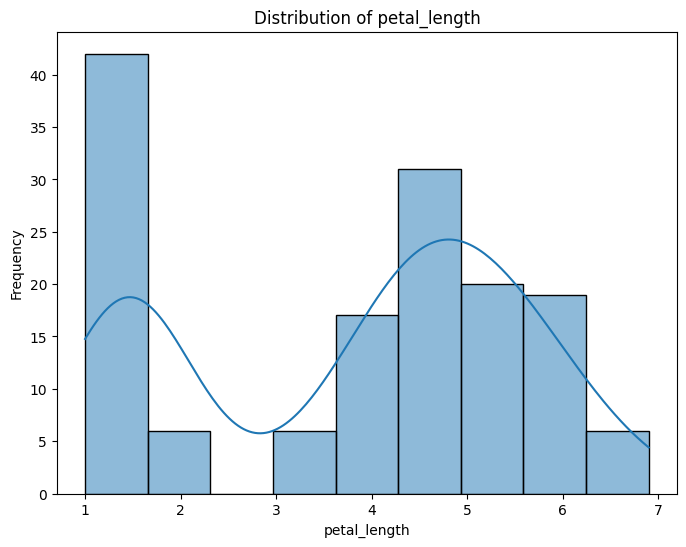

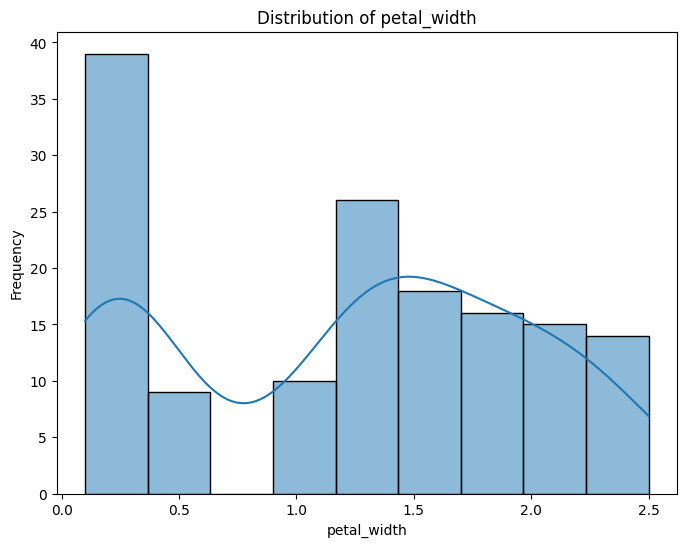

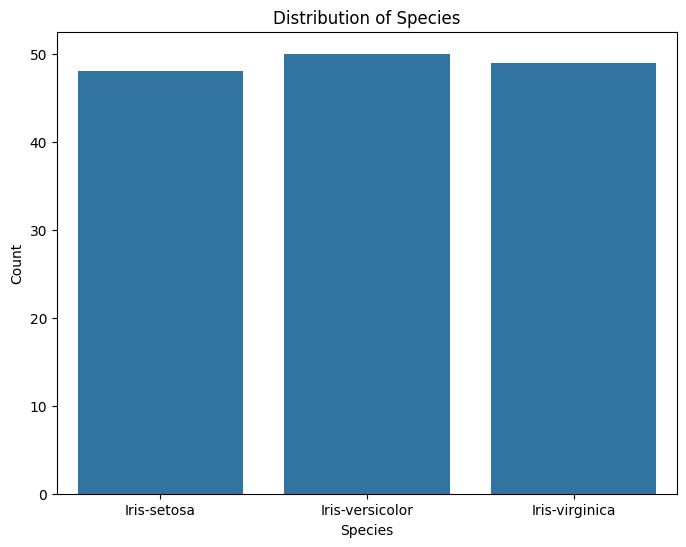

In [ ]:
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='species')
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation for KNN completed.")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")

Data preparation for KNN completed.
X_train shape: (117, 4)
X_test shape: (30, 4)


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9333

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_knn = grid_search.best_estimator_
y_pred_tuned = best_knn.predict(X_test_scaled)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nAccuracy of the tuned model on the test set: {accuracy_tuned:.4f}")

print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))

Best parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation accuracy: 0.9830

Accuracy of the tuned model on the test set: 0.9333

Classification Report for Tuned Model:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # 1 for Manhattan distance, 2 for Euclidean distance
}

knn_rand = KNeighborsClassifier()

# Initialize RandomizedSearchCV
# n_iter is the number of parameter settings that are sampled
random_search = RandomizedSearchCV(knn_rand, param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

print(f"Best parameters from RandomizedSearchCV: {random_search.best_params_}")
print(f"Best cross-validation accuracy from RandomizedSearchCV: {random_search.best_score_:.4f}")

best_knn_rand = random_search.best_estimator_
y_pred_rand = best_knn_rand.predict(X_test_scaled)

accuracy_rand = accuracy_score(y_test, y_pred_rand)
print(f"\nAccuracy of the best RandomizedSearchCV model on the test set: {accuracy_rand:.4f}")

print("\nClassification Report for Best RandomizedSearchCV Model:")
print(classification_report(y_test, y_pred_rand))

Best parameters from RandomizedSearchCV: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best cross-validation accuracy from RandomizedSearchCV: 0.9830

Accuracy of the best RandomizedSearchCV model on the test set: 0.9333

Classification Report for Best RandomizedSearchCV Model:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



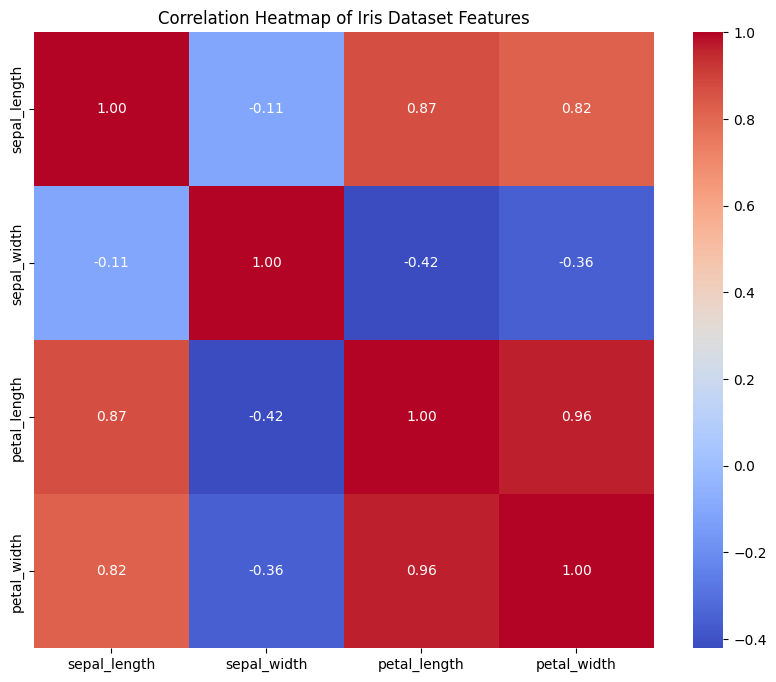

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()

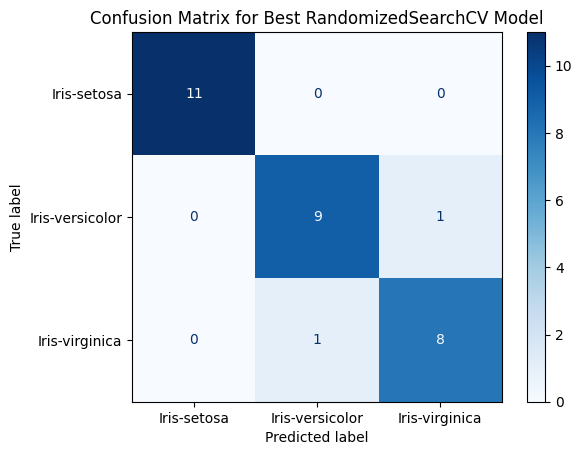

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix for the best RandomizedSearchCV model
cm = confusion_matrix(y_test, y_pred_rand, labels=best_knn_rand.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn_rand.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best RandomizedSearchCV Model')
plt.show()